<a href="https://colab.research.google.com/github/krish-navulla/Blueberry-Yield-Prediction/blob/main/Blueberry_Yeild_Prediction_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install dabl
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import dabl
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

In [ ]:
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection  import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn import metrics
from sklearn.model_selection import RepeatedKFold

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import joblib
%matplotlib inline

In [ ]:
import seaborn as sns

In [ ]:
df=pd.DataFrame

In [ ]:
data=pd.read_csv("/content/WildBlueberryPollinationSimulationData.csv")


**Exploratory Data Analysis**

In [ ]:
data.info

<bound method DataFrame.info of      Row#  clonesize  honeybee  bumbles  andrena  osmia  MaxOfUpperTRange  \
0       0       37.5     0.750    0.250    0.250  0.250              86.0   
1       1       37.5     0.750    0.250    0.250  0.250              86.0   
2       2       37.5     0.750    0.250    0.250  0.250              94.6   
3       3       37.5     0.750    0.250    0.250  0.250              94.6   
4       4       37.5     0.750    0.250    0.250  0.250              86.0   
..    ...        ...       ...      ...      ...    ...               ...   
772   772       10.0     0.537    0.117    0.409  0.058              86.0   
773   773       40.0     0.537    0.117    0.409  0.058              86.0   
774   774       20.0     0.537    0.117    0.409  0.058              86.0   
775   775       20.0     0.537    0.117    0.409  0.058              89.0   
776   776       20.0     0.537    0.117    0.409  0.058              89.0   

     MinOfUpperTRange  AverageOfUpperTRange

In [ ]:
data_clean=dabl.clean(data)
data_clean.isna().sum()

clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

In [ ]:
data_clean.head(20)

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543
5,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.309669,0.366284,27.345454,2825.003738
6,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.284443,0.352186,26.101179,2625.269164
7,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.246568,0.342826,25.042361,2379.905214
8,37.5,0.75,0.25,0.25,0.25,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.427977,0.414711,32.334153,4234.868585
9,37.5,0.75,0.25,0.25,0.25,77.4,46.8,64.7,55.8,27.0,45.8,1.0,0.10,0.464366,0.436346,34.849953,5356.871861


In [ ]:
figs=plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

Target looks like regression


/usr/local/lib/python3.7/dist-packages/dabl/plot/utils.py:633: UserWarning: Dropped 1 outliers in column bumbles.
  int(dropped), series.name), UserWarning)
/usr/local/lib/python3.7/dist-packages/dabl/plot/utils.py:633: UserWarning: Dropped 4 outliers in column honeybee.
  int(dropped), series.name), UserWarning)


[array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1d6c65bc90>,
       dtype=object), None]

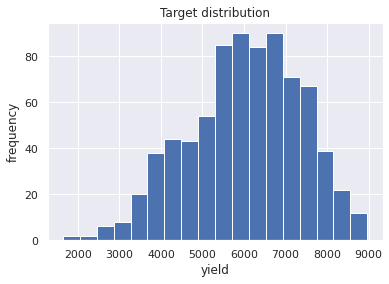

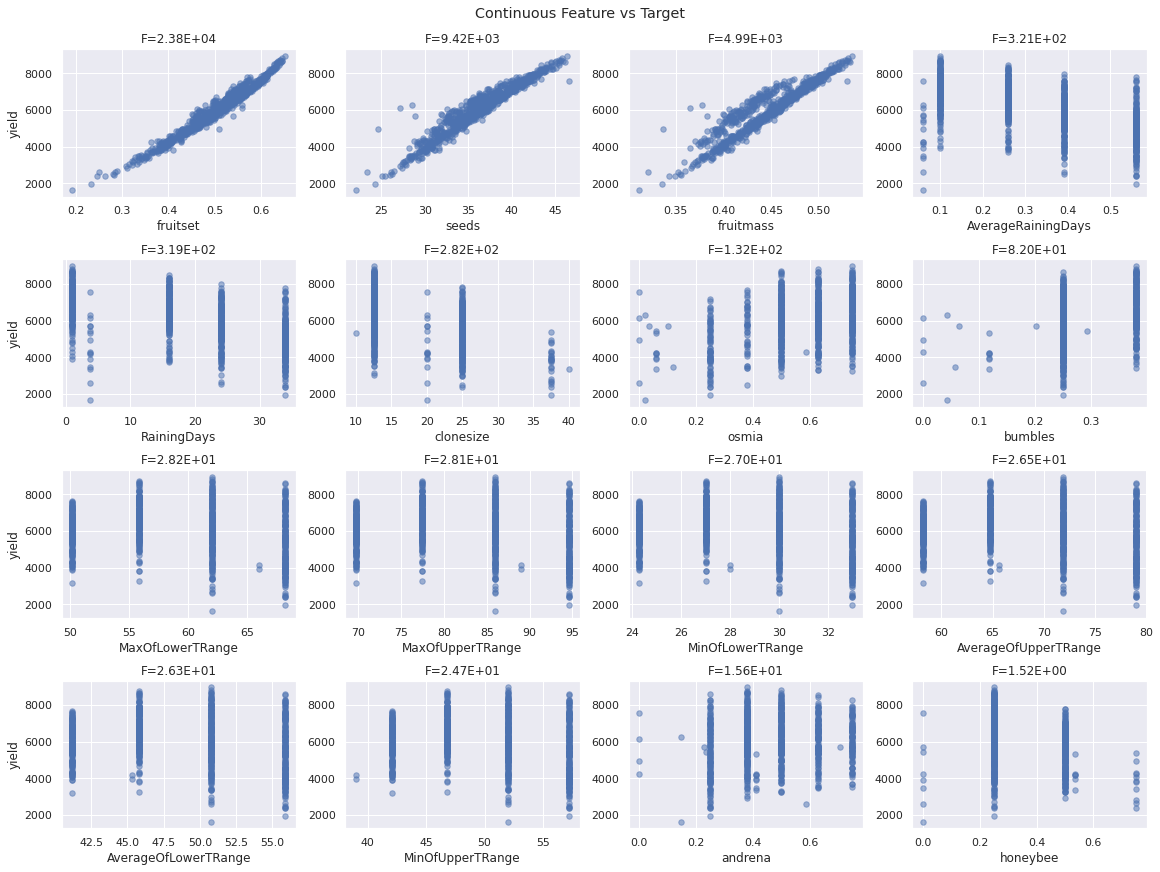

In [ ]:
dabl.plot(data_clean, target_col='yield')

Trying to use BoxPLot or Violin Plot to better understand the distribution of the data.

In [ ]:
data.describe()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,388.000000,18.767696,0.417133,0.282389,0.468817,0.562062,82.277091,49.700515,68.723037,59.309395,28.690219,48.613127,18.309292,0.320000,0.502121,0.445983,36.122432,6012.849165
std,224.444871,6.999063,0.978904,0.066343,0.161052,0.169119,9.193745,5.595769,7.676984,6.647760,3.209547,5.417072,12.124226,0.171279,0.079445,0.040333,4.377889,1356.955318
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1637.704022
25%,194.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,3.770000,0.100000,0.454725,0.416281,33.116091,5124.854901
50%,388.000000,12.500000,0.250000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.508297,0.445587,36.166044,6107.382466
75%,582.000000,25.000000,0.500000,0.380000,0.630000,0.750000,89.000000,52.000000,71.900000,66.000000,30.000000,50.800000,24.000000,0.390000,0.561297,0.476149,39.239668,7022.189731
max,776.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401842


Constants - Max=!Min ;
Pseudo nulls ;
skewness ;
null ;

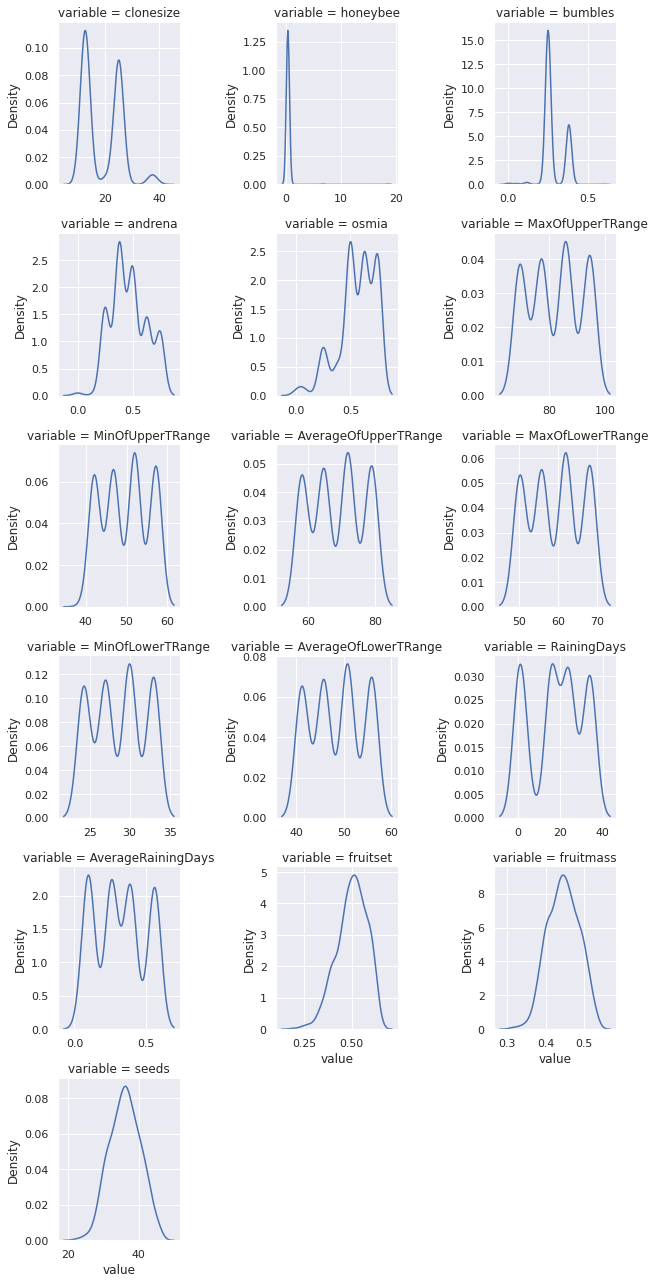

In [ ]:
reshaped = pd.melt(data_clean, data_clean.describe().columns[-1],data_clean.describe().columns[:-1]) #reshaping wrt yield
a = sns.FacetGrid(reshaped,col="variable",col_wrap=3, sharex=False, sharey=False)
a.map(sns.kdeplot,"value")



/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


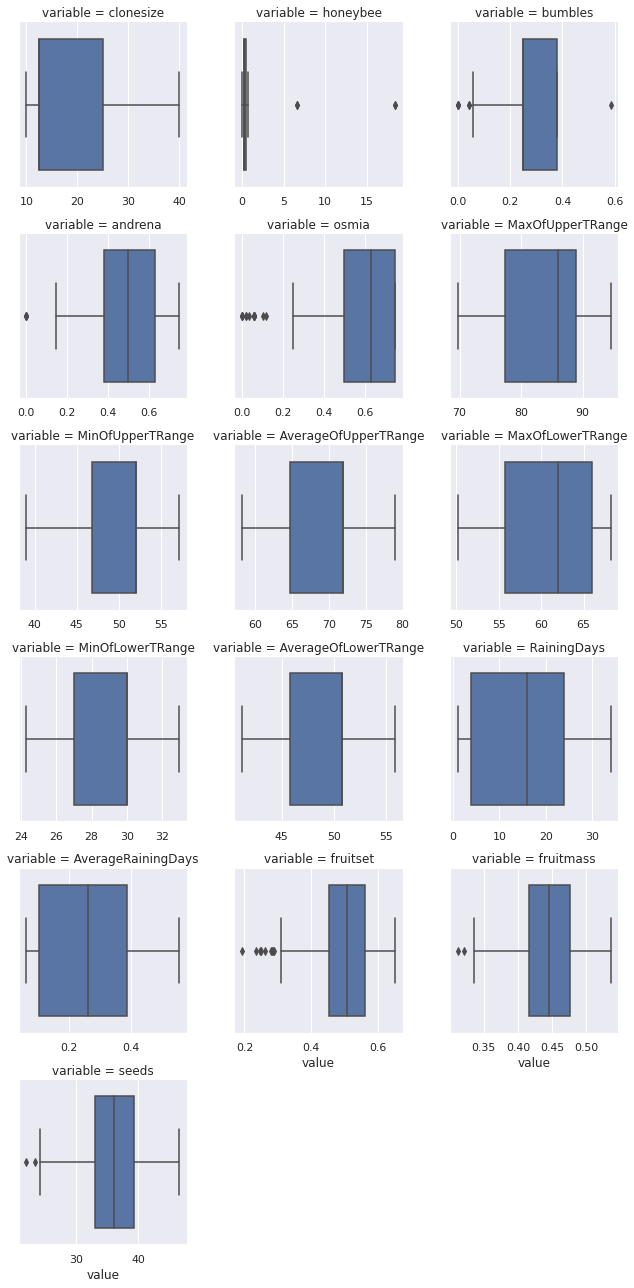

In [ ]:
reshaped = pd.melt(data_clean, data_clean.describe().columns[-1],data_clean.describe().columns[:-1]) #reshaping wrt yield
a = sns.FacetGrid(reshaped,col="variable",col_wrap=3, sharex=False, sharey=False)
a.map(sns.boxplot,"value")


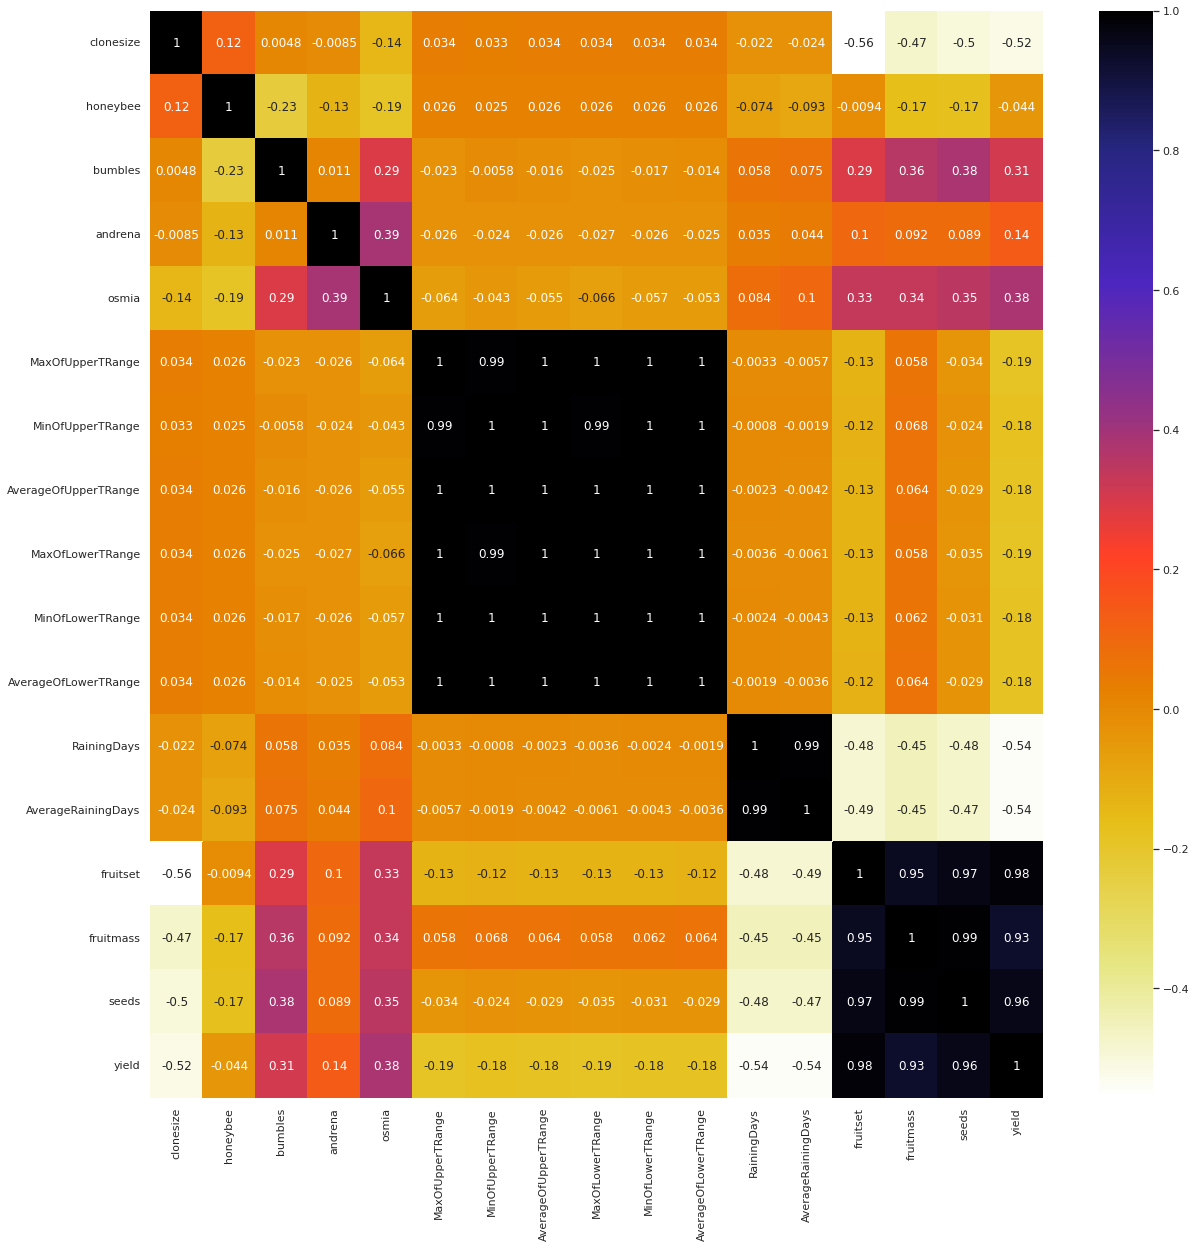

In [ ]:
plt.figure(figsize=(20,20))
sns.set()
sns.heatmap(data_clean.corr(),annot=True,cmap=plt.cm.CMRmap_r) #cmap is the colormap


**Preprocessing**

In [ ]:
data_clean.columns

Index(['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

In [ ]:
data_process=data_clean.drop(columns=['honeybee','MaxOfUpperTRange', 'MinOfUpperTRange','MaxOfLowerTRange', 'MinOfLowerTRange','RainingDays'])
data_process.columns

Index(['clonesize', 'bumbles', 'andrena', 'osmia', 'AverageOfUpperTRange',
       'AverageOfLowerTRange', 'AverageRainingDays', 'fruitset', 'fruitmass',
       'seeds', 'yield'],
      dtype='object')

In [ ]:
part1= data_process.drop(columns=['yield'])
part2= data_process['yield']
part1

,clonesize,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays,fruitset,fruitmass,seeds
0,37.5,0.250,0.250,0.250,71.9,50.8,0.26,0.410652,0.408159,31.678898
1,37.5,0.250,0.250,0.250,71.9,50.8,0.10,0.444254,0.425458,33.449385
2,37.5,0.250,0.250,0.250,79.0,55.9,0.26,0.383787,0.399172,30.546306
3,37.5,0.250,0.250,0.250,79.0,55.9,0.10,0.407564,0.408789,31.562586
4,37.5,0.250,0.250,0.250,71.9,50.8,0.39,0.354413,0.382703,28.873714
...,...,...,...,...,...,...,...,...,...,...
772,10.0,0.117,0.409,0.058,71.9,50.8,0.06,0.486815,0.428012,33.447471
773,40.0,0.117,0.409,0.058,71.9,50.8,0.06,0.342841,0.377915,28.462005
774,20.0,0.117,0.409,0.058,71.9,50.8,0.39,0.404617,0.401670,30.748240
775,20.0,0.117,0.409,0.058,65.6,45.3,0.06,0.401538,0.399935,30.582161


In [ ]:
Q1 = part1.quantile(0.25)
Q3 = part1.quantile(0.75)
IQR=Q3-Q1
IQR

clonesize               12.500000
bumbles                  0.130000
andrena                  0.250000
osmia                    0.250000
AverageOfUpperTRange     7.200000
AverageOfLowerTRange     5.000000
AverageRainingDays       0.290000
fruitset                 0.106571
fruitmass                0.059869
seeds                    6.123577
dtype: float64

In [ ]:
data_process_nooutlier=data_process[~((data_process<(Q1-1.5*IQR))|(data_process>(Q3+1.5*IQR))).any(axis=1)]
data_process_nooutlier.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


(752, 11)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


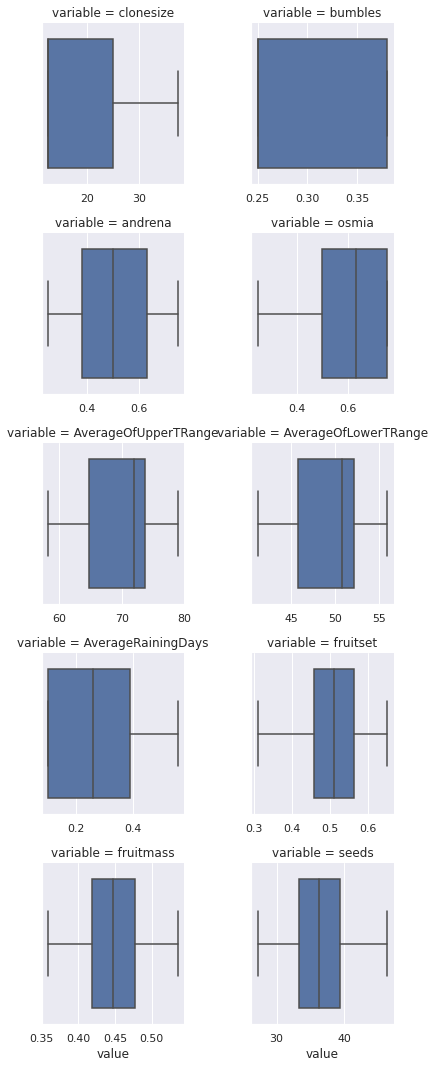

In [ ]:
reshaped = pd.melt(data_process_nooutlier, data_process_nooutlier.describe().columns[-1],data_process_nooutlier.describe().columns[:-1]) #reshaping wrt yield
a = sns.FacetGrid(reshaped,col="variable",col_wrap=2, sharex=False, sharey=False)
a.map(sns.boxplot,"value")


**Feature** **Selection**

In [ ]:
def select_feature_infogain_based(X_train, y_train, X_test, x="all"):
  if type(x)==str:
    fs_info=SelectKBest(score_func=mutual_info_regression, k='all')
  else :
    fs_info = SelectKBest(score_func=mutual_info_regression,k=x)
  fs_info.fit(X_train, y_train)
  X_train_fs = fs_info.transform(X_train)
  X_test_fs = fs_info.transform(X_test)

  return X_train_fs, X_test_fs, fs_info



In [ ]:
X, Y = part1, part2

X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.33,random_state=1)

X_train_fs, X_test_fs, fs_info = select_feature_infogain_based(X_train, y_train,X_test)

Selecting correct Algorithm

Regression is a statistical measurement that attempts to determine the strength of the relationship between a dependent variable and a series of independent variables.



**Modelling**

LINEAR REGRASSION


In [ ]:
lreg = LinearRegression()
lreg.fit(X_train_fs,y_train)
yresult= lreg.predict(X_test_fs)

In [ ]:
e_linear= mean_absolute_error(y_test, yresult)
e_linear


106.54404083838077

**Random Forest Regression**

In [ ]:

Rreg = RandomForestRegressor()
Rreg.fit(X_train_fs,y_train)
yresult= Rreg.predict(X_test_fs)

e_RLinear= mean_squared_error(y_test, yresult)
e_rsme=np.sqrt(e_RLinear)
e_rsme

192.0557971094274

**Hyper Parameter Tuning** 

Create Estimator, the range of capacities on which the hyperparameters need to be trained

In [ ]:
cv= RepeatedKFold(n_splits=50, n_repeats=3,random_state=1)
fs_info_v0=SelectKBest(score_func=mutual_info_regression)

#pipeline
pipe_rf=Pipeline([
  ('sel',fs_info_v0),
  ('model',RandomForestRegressor(random_state=1))
])

In [ ]:
param_range= [15,18,10]
param_range_fl=[5.0,10.0]

grid_params_rf = [{'sel_k':[i for i in range(X_train_fs.shape[1]-6, X_train_fs.shape[1]-4)],
                   'model_criterion': ['mse','mae'],
                   }]
``
RF = GridSearchCV(estimator = pipe_rf,
                  param_grid= grid_params_rf,
                  scoring='neg_mean_squared_error',
                  cv=cv,
                  n_jobs=-1)

In [ ]:
RF.fit(X_train_fs, y_train)
y_pred_v0=gs.predict(X_test_fs)

ValueError: ignored